## Gradient Descent

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
adv=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/Advertising.csv')
train,test=train_test_split(adv,test_size=0.2,random_state=100)

In [28]:
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [34]:
train_x=train[['TV']]
train_y=train['sales']

In [35]:
#we do scaling or normalization so that we can compare the columns
scaler=StandardScaler()
scaler.fit(train_x)
train_x_scaled=pd.DataFrame(scaler.transform(train_x),columns=train_x.columns)

In [36]:
########using the linear regression model to calculate the coefficients################
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x_scaled,train_y)
print(model.coef_,model.intercept_)
#######################################################################################

[4.18753862] 13.798750000000002


In [37]:
#continuation..
m_old=100
c_old=100
m_values=[]
c_values=[]
error_values=[]

N=train_x_scaled.shape[0]
alpha=0.1

for i in range(1000):
    #update m
    sum_part=(2/N)*((-1*train_x_scaled['TV']*train_y)+\
                   (m_old*np.square(train_x_scaled['TV']))+\
                    (c_old*train_x_scaled['TV'])).sum()
    m_new=m_old-alpha*sum_part

    #update c
    sum_part = (2/N)*(m_old*train_x_scaled['TV']+\
                     c_old-train_y).sum()
    c_new=c_old-alpha*sum_part
    
    #calculate error
    error= (1/N)*(train_y-m_new*train_x_scaled['TV']-c_old).sum()
    
    m_values.append(m_new)
    c_values.append(c_new)
    error_values.append(error)
    
    m_old=m_new
    c_old=c_new
m_new,c_new

(0.7198943802089272, 13.603511544787887)

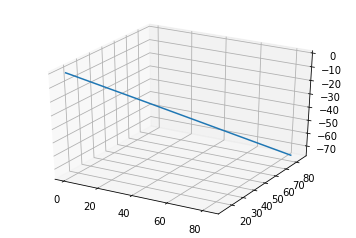

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(m_values,c_values,error_values)
plt.show()

In [39]:
import plotly
import json
from plotly.tools import FigureFactory as FF
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot ,iplot
import matplotlib as mpl
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot ,iplot
import plotly
import cufflinks as cf
#plotly.tools.set_credentials_file(username='zeet.321@gmail.com', api_key='RHZE5QMi3demNzeOipG6')
#plotly.tools.set_credentials_file(username='harjeet.singh.lko321@gmail.com', api_key='bXbLauEeD193HqXNxUeJ')
plotly.tools.set_credentials_file(username='Ranajay', api_key='aCzVlD35RJ94Z26viZ6r')


trace=go.Scatter3d(x=m_values,y=c_values,z=error_values,mode='markers')
data=[trace]

layout = dict(
    height=800, width=800, title='plot 3d',
    scene=dict(
        xaxis=dict(title='m_values'),
        yaxis=dict(title='c_values'),
        zaxis=dict(title='error_values'),
        camera=dict(
            eye=dict(x=-1.7, y=-1.7, z=0.5)
        )
    )
)


fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='line chart')

# PCA

In [41]:
data=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/ellipse.csv')
data.head()

,x,y
0,3.500000,4.500000
1,3.482555,4.509875
2,3.464861,4.519499
3,3.446921,4.528871
4,3.428737,4.537990


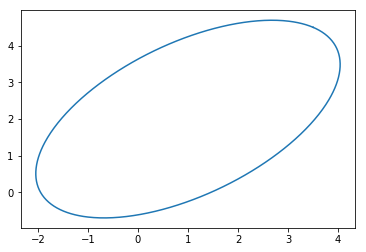

In [42]:
plt.plot(data['x'],data['y'])

1. Data dimension == PCs dimension
2. NO meaning to PCs. It is just numbers. Basically no unit
3. PCs  variances = eigen values of corr(data)
4. Correlation between PCs will always be zero


In [55]:
#Data dimension == PCs dimension
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
pcs=pd.DataFrame(pca.transform(data),
        columns=['PC1','PC2'])
pcs.shape ,data.shape

((629, 2), (629, 2))

In [56]:
#NO meaning to PCs. It is just numbers. Basically no unit
pcs.var()

PC1    6.455312
PC2    1.812428
dtype: float64

In [54]:
#PCs  variances = eigen values of corr(data)
np.linalg.eig(pd.DataFrame(data_scaled).corr())

(array([1.552432, 0.447568]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [53]:
#Correlation between PCs will always be zero
pcs.corr()

,PC1,PC2
PC1,1.000000e+00,-1.243533e-16
PC2,-1.243533e-16,1.000000e+00
